In [1]:
import pandas as pd

# importing matplotlib module
from matplotlib import pyplot as plt


In [2]:
!qbraid jobs enable -n qbraid_sdk

"qbraid" non Š riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


In [3]:
import numpy as np

In [4]:
df1=pd.read_csv("qupermarket_weather_data.csv")
df1.head()


,Montag,Mon,Dienstag,Tue,Mittwoch,Wed,Donnerstag,Thu,Freitag,Fri,Samstag,Sat,Sonntag,Sun
0,0:00,Night,0:00,Night,0:00,Night,0:00,Night,0:00,Night,0:00,Night,0:00,Night
1,0:30,Night,0:30,Night,0:30,Night,0:30,Night,0:30,Night,0:30,Night,0:30,Night
2,1:00,Night,1:00,Night,1:00,Night,1:00,Night,1:00,Night,1:00,Night,1:00,Night
3,1:30,Night,1:30,Night,1:30,Night,1:30,Night,1:30,Night,1:30,Night,1:30,Night
4,2:00,Night,2:00,Night,2:00,Night,2:00,Night,2:00,Night,2:00,Night,2:00,Night


In [5]:
df_prod=df1.filter(["Montag","Mon","Tue","Wed","Thu", "Fri", "Sat", "Sun"])
df_prod.rename(columns = {'Montag':'Time'}, inplace = True)
df_prod.head()

,Time,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,0:00,Night,Night,Night,Night,Night,Night,Night
1,0:30,Night,Night,Night,Night,Night,Night,Night
2,1:00,Night,Night,Night,Night,Night,Night,Night
3,1:30,Night,Night,Night,Night,Night,Night,Night
4,2:00,Night,Night,Night,Night,Night,Night,Night


In [6]:
cols = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
df_prod[cols] = df_prod[cols].replace({"Night":0.0, "Rain":25.0, "Cloudy": 40.0, "Sun":90.0})
                  
print(df_prod)

     Time   Mon   Tue   Wed   Thu   Fri   Sat   Sun
0    0:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0
1    0:30   0.0   0.0   0.0   0.0   0.0   0.0   0.0
2    1:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0
3    1:30   0.0   0.0   0.0   0.0   0.0   0.0   0.0
4    2:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0
5    2:30   0.0   0.0   0.0   0.0   0.0   0.0   0.0
6    3:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0
7    3:30   0.0   0.0   0.0   0.0   0.0   0.0   0.0
8    4:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0
9    4:30   0.0   0.0   0.0   0.0   0.0   0.0   0.0
10   5:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0
11   5:30   0.0   0.0   0.0   0.0   0.0   0.0   0.0
12   6:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0
13   6:30   0.0   0.0   0.0   0.0   0.0   0.0   0.0
14   7:00  40.0  25.0  25.0  90.0  90.0  40.0  25.0
15   7:30  40.0  25.0  25.0  90.0  90.0  40.0  25.0
16   8:00  40.0  25.0  40.0  90.0  40.0  90.0  40.0
17   8:30  25.0  40.0  25.0  40.0  90.0  90.0  40.0
18   9:00  4

In [7]:
df_cons= pd.DataFrame({'Time': df_prod["Time"]},
                  index=df_prod.index)

In [8]:
df_cons[cols] = 60


df_cons["Sun"] = 12
boolean_condition = df_cons.index < 16
for i in cols:
    df_cons.loc[boolean_condition, i] = 12.
    
boolean_condition = df_cons.index > 43
for i in cols:
    df_cons.loc[boolean_condition, i] = 12

In [9]:
print(df_cons)

     Time  Mon  Tue  Wed  Thu  Fri  Sat  Sun
0    0:00   12   12   12   12   12   12   12
1    0:30   12   12   12   12   12   12   12
2    1:00   12   12   12   12   12   12   12
3    1:30   12   12   12   12   12   12   12
4    2:00   12   12   12   12   12   12   12
5    2:30   12   12   12   12   12   12   12
6    3:00   12   12   12   12   12   12   12
7    3:30   12   12   12   12   12   12   12
8    4:00   12   12   12   12   12   12   12
9    4:30   12   12   12   12   12   12   12
10   5:00   12   12   12   12   12   12   12
11   5:30   12   12   12   12   12   12   12
12   6:00   12   12   12   12   12   12   12
13   6:30   12   12   12   12   12   12   12
14   7:00   12   12   12   12   12   12   12
15   7:30   12   12   12   12   12   12   12
16   8:00   60   60   60   60   60   60   12
17   8:30   60   60   60   60   60   60   12
18   9:00   60   60   60   60   60   60   12
19   9:30   60   60   60   60   60   60   12
20  10:00   60   60   60   60   60   60   12
21  10:30 

Graphs of Solar Production and Energy need over week days, each bin represents the solar energy production and the energy consumtion in a half an hour slot.

Solar production and energy consumption plots

In [10]:
a_cons=df_cons.iloc[:,1:].values.T

a_prod=df_prod.iloc[:,1:].values.T

a_plug=a_cons - a_prod

a_imb=a_plug.copy()

a_plug[a_plug <0]=0

a_co2=a_plug*420.

df_CO2= pd.DataFrame({'Time': df_prod["Time"]},
                  index=df_prod.index)

for i in range(len(cols)):
    df_CO2[cols[i]]=a_co2[i]
    
    

KeyboardInterrupt: 

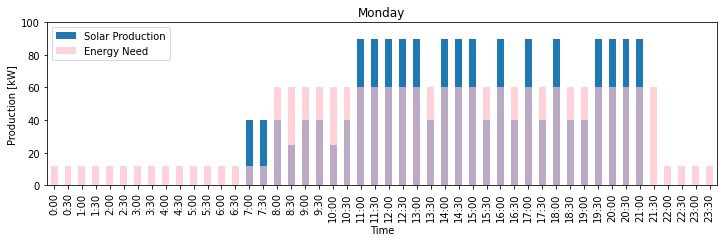

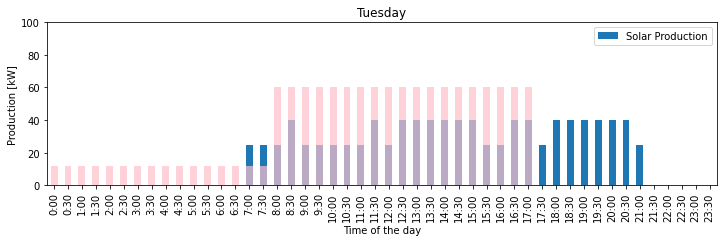

In [11]:
week_days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
full_names=res = dict(zip(cols, week_days))

for i in cols:
    ax=df_prod.plot(x="Time", y=i, kind="bar", figsize=(12, 3), label="Solar Production")
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("Production [kW]")
    ax.set_ylim([0,100])
    ax.set_title(full_names[i])
    df_cons.plot(ax=ax , x="Time", y=i, kind="bar", color="pink", alpha=0.7, figsize=(12, 3), label="Energy Need")
plt.show()

Graphs over weekdays of CO2 production for each half an hour time slot for the system SolarProduction+EnergyNeed without considering the mall battery

In [ ]:
for i in cols:
    ax=df_CO2.plot(x="Time", y=i, kind="bar", figsize=(12, 3), label="CO2 production with no batteries")
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("CO2 production in [g] per half an hour ")
    ax.set_title(full_names[i])
    ax.set_ylim([0,30000])
   
plt.show()

In [ ]:
dfc=pd.read_csv("qupermarket_car_data.csv")
dfc.head()


short_days=["Mon","Tue", "Wed","Thu","Fri","Sat"]

dict_cars={}
for i in range(len(week_days)-1):
    dict_cars[short_days[i]]= pd.DataFrame()
    dict_cars[short_days[i]]=dfc.loc[dfc['Day'] == week_days[i]]
    

In [ ]:
mall_battery_cap=500
mall_battery_rate=120
ev_battery_cap=60
ev_battery_rate=120


In [ ]:
print(dict_cars['Mon'])

In [ ]:
df_car_histo= pd.DataFrame({'Time': df_prod["Time"]},
                  index=df_prod.index)
df_car_histo[cols] = 0


a_histo=df_car_histo.iloc[:,1:].values.T
a_histo_pri=np.zeros_like(a_histo)



ArrData={}
PbatterA={}
DepData={}
PbatterD={}
for i in range(len(week_days)-1):
    ArrData[short_days[i]] = dict_cars[short_days[i]].iloc[ : , 2 ].values
    PbatterA[short_days[i]] = dict_cars[short_days[i]].iloc[ : , 3 ].values
    DepData[short_days[i]] = dict_cars[short_days[i]].iloc[ : , 4 ].values
    PbatterD[short_days[i]] = dict_cars[short_days[i]].iloc[ : , 5].values
    
    for k in range(ArrData[short_days[i]].shape[0]):
        start_index=df_prod.index[df_prod['Time'] == ArrData[short_days[i]][k] ].tolist()[0]
        end_index=df_prod.index[df_prod['Time'] == DepData[short_days[i]][k] ].tolist()[0]
        
        # print("%s %d"%( ArrData[short_days[i]][k] ,start_index))
        # print("%s %d"%(DepData[short_days[i]][k] ,end_index))
        #the index here runs up to end_index+1 as departure
        #time is intended at the end of the slot!
        for j in range(start_index,end_index+1):
             a_histo[i, j] = a_histo[i, j]+1
        a_histo_pri[i, end_index]=a_histo_pri[i, end_index]+1
            

#Let's prepare a reduced version for qaoa

a_histo_qaoa=a_histo//4
                
for i in range(len(cols)):
    df_car_histo[cols[i]]=a_histo[i]
    
for i in range(len(cols)):
    df_car_histo["pridep"+cols[i]]=a_histo_pri[i]   
#print(df_car_histo)

In [ ]:

for i in cols:
    ax=df_car_histo.plot(x="Time", y=i, kind="bar", figsize=(12, 3), label="Histogram of vehicles in the parking")
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("Number of vehickes")
    ax.set_ylim([0,35])
    ax.set_title(full_names[i])
plt.show()

In [ ]:
for i in cols:
    j="pridep"+i
    ax=df_car_histo.plot(x="Time", y=j, kind="bar", figsize=(12, 3), label="Histogram of priorities of recharge for vehicles in the parking")
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("Number of vehickes")
    ax.set_ylim([0,35])
    ax.set_title(full_names[i])
plt.show()

Matrix allocations


In [ ]:
c_plug=420
c_p=c_plug
c_bd=84
c_br=-84

a_plug=1
a_bd=1.5
a_br=1.5


aa_pp=a_plug*a_plug
aa_pbd=a_plug*a_bd
aa_pbr=a_plug*a_br
a_pb=a_plug*a_bd

cc_pp=c_plug*c_plug
cc_pbd=c_plug*c_bd
cc_pbr=c_plug*c_br
cc_pb=c_plug*c_bd

In [ ]:
# part still in construction
n_bat_mall=1
E_bat_mall=500
r_bat_mall=120
n_qub_bm=n_bat_mall*3

C_bat_status=np.zeros_like(a_imb)

C_bat_status[0,0]=0.7*E_bat_mall

#we have 3 qubits for each battery, 1 for discharging 
#1 for charging and 1 for the slack variable

sigma_slack=np.full((3,3),2)
for i in range(3):
    sigma_slack[i,i]=0.
mu_slack=np.full((3),-1)

n_times=48
n_days = 7

r_bat_v=60
dt=0.5 # fraction of an hour

#for d in range (n_days):
 #   for t in range(n_times):
C_bat_mall=0
for d in range (1):  
    for t in range(10,11):  
        N_v=a_histo[d,t]
        n_qub_v=N_v*3
        n_qub_tot=n_qub_bm+n_qub_v
        sigma_p=np.zeros((n_qub_tot,n_qub_tot))
        for i in range(n_bat_mall):
            sigma_p[3*i,3*i+1]=-2*(r_bat_mall**2)*dt*dt*aa_pp
        
        E_imb=a_imb[d,t]
        for k in range(n_bat_mall):
            for i in range(N_v):
                sigma_p[3*k,3*n_bat_mall+3*i]=aa_pbd*(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k+1,3*n_bat_mall+3*i]=-aa_pbr*(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k,3*n_bat_mall+3*i+1]=-aa_pbd*(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k+1,3*n_bat_mall+3*i+1]=aa_pbr*(r_bat_mall*r_bat_v)*dt*dt
                
        mu_p=np.zeros((n_qub_tot))
        mu_p[2]=0.
        r_bat_mdisc=r_bat_mall*dt
        if C_bat_status[d,t]==0 :
            r_bat_mdisc=10000
        elif (N_v ==0): 
            r_bat_mdisc=min(E_imb, r_bat_mall*dt)
        r_bat_mcharge=r_bat_mall*dt    
        if C_bat_status[d,t]==500 :
            r_bat_mcharge=100000
        print(E_imb)
        
        for k in range(n_bat_mall)  :
            mu_p[3*k]=-2*aa_pp*E_imb*r_bat_mdisc
            mu_p[3*k+1]=2*aa_pp*E_imb*r_bat_mcharge
        for i in range(N_v):
            mu_p[3*n_bat_mall+3*i]=2*aa_pbd*E_imb*r_bat_v*dt
            mu_p[3*n_bat_mall+3*i+1]=-2*aa_pbr*E_imb*r_bat_v*dt
        
        
print(E_imb)        
sigma_p=0.5*(sigma_p + sigma_p.T)
     
    
sigma=sigma_slack
mu=mu_p +10000000*mu_slack
print(mu)
print(sigma)





In [ ]:
import numpy as np
#import copy

# Problem modelling imports
from docplex.mp.model import Model

# Qiskit imports
from qiskit import BasicAer
from qiskit.utils import QuantumInstance
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit.utils.algorithm_globals import algorithm_globals
from qiskit_optimization.algorithms import MinimumEigenOptimizer, CplexOptimizer
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.problems.variable import VarType
from qiskit_optimization.converters.quadratic_program_to_qubo import QuadraticProgramToQubo
from qiskit_optimization.translators import from_docplex_mp


In [ ]:
def create_problem_old(mu: np.array, sigma: np.array) -> QuadraticProgram:
    """Solve the quadratic program using docplex."""

    mdl = Model()
    x = [mdl.binary_var("x%s" % i) for i in range(len(sigma))]

    objective = mdl.sum([mu[i] * x[i] for i in range(len(mu))])
    objective -= 2 * mdl.sum(
        [sigma[i, j] * x[i] * x[j] for i in range(len(mu)) for j in range(len(mu))]
    )
    mdl.maximize(objective)
    cost = mdl.sum(x)
    mdl.add_constraint(cost == 1)
    
    qp = from_docplex_mp(mdl)
    return qp


In [ ]:
def create_problem(mu: np.array, sigma: np.array, E_imb: float, r_disc: float, r_charge: float, total: int = 3) -> QuadraticProgram:
    """Solve the quadratic program using docplex."""

    mdl = Model()
    x = [mdl.binary_var("x%s" % i) for i in range(len(sigma))]

    objective = mdl.sum([mu[i] * x[i] for i in range(len(mu))])
    objective -= 2 * mdl.sum(
        [sigma[i, j] * x[i] * x[j] for i in range(len(mu)) for j in range(len(mu))]
    )
    mdl.maximize(objective)
    cost = mdl.sum(x)
    mdl.add_constraint(cost == 1)
    
    a = [0] * len(mu)
    a[0]=-r_disc
    a[1]=r_charge
    cost2 = mdl.sum([a[i] * x[i] for i in range(len(mu))])
    mdl.add_constraint(cost2 >= -E_imb)
    qp = from_docplex_mp(mdl)
    return qp




In [ ]:
qubo = create_problem_old(mu, sigma)

print(qubo.prettyprint())

In [ ]:
result = CplexOptimizer().solve(qubo)
print(result.prettyprint())
c_stars = result.samples[0].x

print(c_stars)



In [ ]:
algorithm_globals.random_seed = 12345
quantum_instance = QuantumInstance(
    BasicAer.get_backend("statevector_simulator"),
    seed_simulator=algorithm_globals.random_seed,
    seed_transpiler=algorithm_globals.random_seed,
)
qaoa_mes = QAOA(quantum_instance=quantum_instance, initial_point=[0.0, 1.0])
exact_mes = NumPyMinimumEigensolver()

qaoa = MinimumEigenOptimizer(qaoa_mes)
qaoa_result = qaoa.solve(qubo)
print(qaoa_result.prettyprint())
c_stars_qaoa=qaoa_result.samples[0].x

# Conventional solution for lumped mall battery modeling: CPLEX


In [ ]:
# cplex loop implementation
sigma_slack=np.full((3,3),2)
for i in range(3):
    sigma_slack[i,i]=0.
mu_slack=np.full((3),-1)

n_times=48
n_days = 7
r_bat_mall=120
r_bat_v=120
dt=0.5 # fraction of an hour

a_CO2_prod_cplex=np.zeros_like(C_bat_status)

#for d in range (n_days):
 #   for t in range(n_times):


for d in range (n_days):  
    for t in range(n_times):  
        if d==0 and t==0:
            C_bat_mall=440
        elif t==0:
            C_bat_mall=C_bat_status[d-1,n_times-1] 
        else:
            C_bat_mall=C_bat_status[d,t-1]
        N_v=0
        n_qub_v=N_v*3
        n_qub_tot=n_qub_bm+n_qub_v
        sigma_p=np.zeros((n_qub_tot,n_qub_tot))
        for i in range(n_bat_mall):
            sigma_p[3*i,3*i+1]=-2*(r_bat_mall**2)*aa_pp*dt*dt
        
        E_imb=a_imb[d,t]
        for k in range(n_bat_mall):
            for i in range(N_v):
                sigma_p[3*k,3*n_bat_mall+3*i]=-aa_pbr*(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k+1,3*n_bat_mall+3*i]=aa_pbd*(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k,3*n_bat_mall+3*i+1]=aa_pbr*(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k+1,3*n_bat_mall+3*i+1]=-aa_pbd*(r_bat_mall*r_bat_v)*dt*dt
        mu_p=np.zeros((n_qub_tot))
        mu_p[2]=0.
        r_bat_mdisc=r_bat_mall*dt
        if C_bat_mall==0 :
            #r_bat_mdisc=10000
            r_bat_mdisc=0
        elif (N_v ==0): 
            r_bat_mdisc=min(E_imb, r_bat_mall*dt)
        r_bat_mcharge=r_bat_mall*dt    
        if C_bat_mall==500 :
            #r_bat_mcharge=10000
            r_bat_mcharge=0
        
        
        mu_p[0]=( + 2*aa_pp*E_imb*r_bat_mdisc)
        mu_p[1]=-(2*aa_pp*E_imb*r_bat_mcharge)
        
        for i in range(N_v):
             mu_p[3+3*i]=2*aa_pbd*E_imb*r_bat_mall*dt
             mu_p[3+3*i+1]=-2*aa_pbd*E_imb*r_bat_mall*dt  
               
        sigma_p=0.5*(sigma_p + sigma_p.T)
     
        fac_bound=10
        sigma=fac_bound*sigma_slack+sigma_p
        mu=fac_bound*mu_slack+mu_p
        qubo = create_problem_old(mu, sigma)
        result = CplexOptimizer().solve(qubo)
        
        c_stars = result.samples[0].x
        #print(E_imb)
        #print(c_stars)
        
        C_bat_status[d,t]=C_bat_mall-r_bat_mdisc*c_stars[0]+r_bat_mcharge*c_stars[1]
        if C_bat_status[d,t] > 500: 
            C_bat_status[d,t] = 500
        if C_bat_status[d,t] < 0: 
            C_bat_status[d,t] = 0
        
        #print(C_bat_status[d,t])
        E_plug=E_imb+(C_bat_status[d,t]-C_bat_mall)
        
        
                                             
        
        a_CO2_prod_cplex[d,t]=420.0*max(E_plug,0)     

print(C_bat_status[n_days-1,n_times-1])


In [ ]:

for i in range(len(cols)):
    df_CO2["cplex"+cols[i]] = a_CO2_prod_cplex[i]
    



In [ ]:
print(np.sum(a_CO2_prod_cplex, axis=1))



print(df_CO2.sum(axis=0))



In [ ]:
for i in cols:
    j="cplex"+i
    ax=df_CO2.plot(x="Time", y=[i, j], kind="bar", figsize=(12, 3), label=["no battery", "battery"],  alpha=0.6)
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("CO2 production in [g] per half an hour ")
    ax.set_title(full_names[i])
    ax.set_ylim([0,30000])

plt.show()

In [ ]:
df_mall_battery= pd.DataFrame({'Time': df_prod["Time"]},
                  index=df_prod.index)
for i in range(len(cols)):
    df_mall_battery[cols[i]] = C_bat_status[i]


In [ ]:
for i in cols:
    ax=df_mall_battery.plot(x="Time", y=i, kind="bar", figsize=(12, 3), label="Charge Level of the battery")
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("Charge of the Mall Battery")
    ax.set_ylim([0,500])
    ax.set_title(full_names[i])
plt.show()

# Quantum solution for lumped mall battery modeling: QAOA on BasicAer quantum instance


In [ ]:
for i in range(3):
    sigma_slack[i,i]=0.
mu_slack=np.full((3),-1)

n_times=48
n_days = 7
r_bat_mall=120
r_bat_v=120
dt=0.5 # fraction of an hour

C_bat_status=np.zeros_like(C_bat_status)
a_CO2_prod_qaoa=np.zeros_like(C_bat_status)

    
algorithm_globals.random_seed = 12345
quantum_instance = QuantumInstance(
    BasicAer.get_backend("statevector_simulator"),
    seed_simulator=algorithm_globals.random_seed,
    seed_transpiler=algorithm_globals.random_seed,
)


for d in range (n_days):  
    for t in range(n_times):  
        if d==0 and t==0:
            C_bat_mall=440
        elif t==0:
            C_bat_mall=C_bat_status[d-1,n_times-1] 
        else:
            C_bat_mall=C_bat_status[d,t-1]
        N_v=0
        n_qub_v=N_v*3
        n_qub_tot=n_qub_bm+n_qub_v
        sigma_p=np.zeros((n_qub_tot,n_qub_tot))
        for i in range(n_bat_mall):
            sigma_p[3*i,3*i+1]=-2*(r_bat_mall**2)*aa_pp*dt*dt
        
        E_imb=a_imb[d,t]
        for k in range(n_bat_mall):
            for i in range(N_v):
                sigma_p[3*k,3*n_bat_mall+3*i]=aa_pbr*(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k+1,3*n_bat_mall+3*i]=-aa_pbd*(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k,3*n_bat_mall+3*i+1]=-aa_pbr*(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k+1,3*n_bat_mall+3*i+1]=aa_pbd*(r_bat_mall*r_bat_v)*dt*dt
                
        mu_p=np.zeros((n_qub_tot))
    
        r_bat_mdisc=r_bat_mall*dt
        if C_bat_mall==0 :
            r_bat_mdisc=10000
        elif (N_v ==0): 
            r_bat_mdisc=min(E_imb, r_bat_mall)
        r_bat_mcharge=r_bat_mall*dt    
        if C_bat_mall==500 :
            r_bat_mcharge=10000
        
    
        
        mu_p[0]=( + 2*aa_pp*E_imb*r_bat_mdisc)
        mu_p[1]=-(2*aa_pp*E_imb*r_bat_mcharge)
        for i in range(N_v):
            mu_p[3+3*i]=2*aa_pbd*E_imb*r_bat_mall*dt
            mu_p[3+3*i]=-2*aa_pbr*E_imb*r_bat_mall*dt
        
               
        sigma_p=0.5*(sigma_p + sigma_p.T)
     
        fac_bound=10
        sigma=fac_bound*sigma_slack+sigma_p
        mu=fac_bound*mu_slack+mu_p
        qubo = create_problem_old(mu, sigma)
        
        qaoa_mes = QAOA(quantum_instance=quantum_instance, initial_point=[0.0, 1.0])

        qaoa = MinimumEigenOptimizer(qaoa_mes)
        qaoa_result = qaoa.solve(qubo)
        print(qaoa_result.prettyprint())
        c_stars=qaoa_result.samples[0].x
        
        
        C_bat_status[d,t]=C_bat_mall-r_bat_mdisc*c_stars[0]+r_bat_mcharge*c_stars[1]
        if C_bat_status[d,t] > 500: 
            C_bat_status[d,t] = 500
        if C_bat_status[d,t] < 0: 
            C_bat_status[d,t] = 0
        #print(C_bat_status[d,t])
        E_plug=E_imb+(C_bat_status[d,t]-C_bat_mall)
        
        
                                             
        
        a_CO2_prod_qaoa[d,t]=420.0*max(E_plug,0)
        
        
        

print(C_bat_status[n_days-1,n_times-1])

In [ ]:
for i in range(len(cols)):
    df_CO2["qaoa"+cols[i]] = a_CO2_prod_qaoa[i]
    



In [ ]:
for i in cols:
    j="qaoa"+i
    ax=df_CO2.plot(x="Time", y=[i, j], kind="bar", figsize=(12, 3), label=["no battery", "qaoa-battery"],  alpha=0.6)
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("CO2 production in [g] per half an hour ")
    ax.set_title(full_names[i])
    ax.set_ylim([0,30000])

plt.show()


In [ ]:
df_mall_battery_qaoa= pd.DataFrame({'Time': df_prod["Time"]},
                  index=df_prod.index)
for i in range(len(cols)):
    df_mall_battery_qaoa[cols[i]] = C_bat_status[i]


In [ ]:
for i in cols:
    ax=df_mall_battery_qaoa.plot(x="Time", y=i, kind="bar", figsize=(12, 3), label="QAOA: Charge Level of the battery")
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("Charge of the Mall Battery")
    ax.set_ylim([0,500])
    ax.set_title(full_names[i])
plt.show()

In [ ]:
for i in range(len(cols)):
    df_CO2["qaoa"+cols[i]] = a_CO2_prod_qaoa[i]
    



In [ ]:
def create_problem_10(mu: np.array, sigma: np.array,E_imb: float, r_disc: np.array, r_charge: np.array) -> QuadraticProgram:
    """Solve the quadratic program using docplex."""

    mdl = Model()
    x = [mdl.binary_var("x%s" % i) for i in range(len(sigma))]

    objective = mdl.sum([mu[i] * x[i] for i in range(len(mu))])
    objective -= 2 * mdl.sum(
        [sigma[i, j] * x[i] * x[j] for i in range(len(mu)) for j in range(len(mu))]
    )
    mdl.maximize(objective)
    for i in range(len(mu)//3):
        cost = x[3*i] +x[3*i+1]+x[3*i+2]
        mdl.add_constraint(cost == 1)
        
    a = [0] * len(mu)
    for k in range(len(mu)//3):
        a[3*k]=-r_disc[k]
        a[3*k+1]=r_charge[k]
   
    if E_imb >0:
        cost2 = mdl.sum([a[i] * x[i] for i in range(len(mu))])
        mdl.add_constraint(cost2 == -E_imb)
    else:
        cost3 = mdl.sum([a[i] * x[i] for i in range(len(mu))])
        mdl.add_constraint(cost3 >= -E_imb)

    qp = from_docplex_mp(mdl)
    return qp

# Conventional CPLEX optimization of the ten batteries array for the mall

In [ ]:
from qiskit import Aer

# cplex loop implementation with ten batteries
sigma_slack=np.full((3,3),2)
for i in range(3):
    sigma_slack[i,i]=0.
mu_slack=np.full((3),-1)

n_times=48
n_days = 7

r_bat_v=60
delta_t=0.5 # fraction of an hour

n_mall_10=10
c_mall_10=50
r_bat_mall_10=60

n_bat_mall=n_mall_10
C_bat_status_10=np.zeros((n_days, n_times,n_mall_10))

a_CO2_prod_cplex_10=np.zeros((n_days, n_times))
#BasicAer.get_backend("statevector_simulator"),
#Aer.get_backend("qasm_simulator")
algorithm_globals.random_seed = 12345
quantum_instance = QuantumInstance(
    BasicAer.get_backend("statevector_simulator"),
    seed_simulator=algorithm_globals.random_seed,
    seed_transpiler=algorithm_globals.random_seed,
)


#for d in range (n_days):
 #   for t in range(n_times):


for d in range (n_days):  
    for t in range(n_times):  
        if d==0 and t==0:
            C_bat_mall_10=np.array([50,50,50,50,50, 50,50,50,40,0])
        elif t==0:
            C_bat_mall_10=C_bat_status_10[d-1,n_times-1,:] 
        else:
            C_bat_mall_10=C_bat_status_10[d,t-1,:]
        N_v=0
        n_qub_mb=n_mall_10*3
        n_qub_v=N_v*3
        n_qub_tot=n_qub_mb+n_qub_v
        print("N qub tot = %d"%n_qub_tot)
        sigma_p=np.zeros((n_qub_tot,n_qub_tot))
        for i in range(n_mall_10):
            sigma_p[3*i,3*i+1]=-2*(r_bat_mall**2)*aa_pp
        
        E_imb=a_imb[d,t]
        for k in range(n_mall_10):
            for i in range(N_v):
                sigma_p[3*k,3*n_bat_mall+3*i]=aa_pbr*(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k+1,3*n_bat_mall+3*i]=-aa_pbd*(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k,3*n_bat_mall+3*i+1]=-aa_pbr*(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k+1,3*n_bat_mall+3*i+1]=aa_pbd*(r_bat_mall*r_bat_v)*dt*dt
                
        mu_p=np.zeros((n_qub_tot))
        
        
        r_bat_mdisc_10=np.full((10),r_bat_mall_10)
        r_bat_mcharg_10=np.full((10),r_bat_mall_10)
        
        r_bat_mdisc_10[C_bat_mall_10 == 0]=0
        print(r_bat_mdisc_10)
        if (N_v ==0): 
            for k in range(n_mall_10):
                r_bat_mdisc_10[k]=min(E_imb, r_bat_mdisc_10[k])
        
        r_bat_mcharg_10[C_bat_mall_10==50]=0
        for k in range(n_bat_mall): 
            mu_p[3*k]=( + 2*aa_pp*E_imb*r_bat_mdisc_10[k])
            mu_p[3*k+1]=-(2*aa_pp*E_imb*r_bat_mcharg_10[k])
            mu_p[3*k+2]=0.        
               
        sigma_p=0.5*(sigma_p + sigma_p.T)
     
    
        sigma_slack_10=np.zeros((n_qub_tot,n_qub_tot))
        for k in range(n_mall_10):
            sigma_slack_10[3*k, 3*k+1]=2
            sigma_slack_10[3*k, 3*k+2]=2
            sigma_slack_10[3*k+1, 3*k+2]=2
    
        mu_slack_10=np.full((n_qub_tot),-1)
    
        fac_bound=100000000
        sigma=fac_bound*sigma_slack_10+sigma_p
        mu=fac_bound*mu_slack_10+mu_p
        qubo = create_problem_10(mu, sigma, E_imb, r_bat_mdisc_10, r_bat_mcharg_10)
        
        ##qaoa_mes = QAOA(quantum_instance=quantum_instance, initial_point=[0.0, 1.0])
        

        #qaoa = MinimumEigenOptimizer(qaoa_mes)
        result = CplexOptimizer().solve(qubo)
        #qaoa_result = qaoa.solve(qubo)
        if t>0:
            for k in range(n_bat_mall):
                if  C_bat_status_10[d,t-1,k]==50:
                    c_stars[3*k+1]=0
                if  C_bat_status_10[d,t-1,k]==0:
                    c_stars[3*k]=0
        #result = CplexOptimizer().solve(qubo)
        
        c_stars = result.samples[0].x
        #print(E_imb)
        print(c_stars)
        for k in range(n_bat_mall):
            C_bat_status_10[d,t,k]=C_bat_mall_10[k]-r_bat_mdisc_10[k]*c_stars[3*k]+r_bat_mcharg_10[k]*c_stars[3*k+1]
            if C_bat_status_10[d,t,k] > 50: 
                C_bat_status_10[d,t,k] = 50
            if C_bat_status_10[d,t,k] < 0: 
                C_bat_status_10[d,t,k] = 0
        
        #print(C_bat_status[d,t])
        E_plug=E_imb+np.sum(C_bat_status_10[d,t,:]-C_bat_mall_10)
        
        
                                             
        
        a_CO2_prod_cplex_10[d,t]=420.0*max(E_plug,0)    

print(C_bat_status_10[n_days-1,n_times-1, :])

In [ ]:
df_mall_battery_10m= pd.DataFrame({'Time': df_prod["Time"]},
                  index=df_prod.index)

for i in range(len(cols)):
    for k in range(n_bat_mall):
        df_mall_battery_10m[cols[i]+str(k)] = C_bat_status_10[i,:,k]
        

        

In [ ]:
labels=[]
for i in range(10):
    labels.append("B"+str(i))

for i in range(len(cols)):
    id =cols[i]
    col_new=[]
    for k in range(n_mall_10):
        col_new.append(id+str(k))
    print(col_new)
    ax=df_mall_battery_10m.plot(x="Time", y=col_new, kind="bar", figsize=(12, 3),  stacked=True, label=labels)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    ax.set_title(full_names[cols[i]])
plt.show()

In [ ]:
for i in range(len(cols)):
    df_CO2["cplex_10"+cols[i]] = a_CO2_prod_cplex_10[i]

In [ ]:
for i in cols:
    j="cplex_10"+i
    ax=df_CO2.plot(x="Time", y=[i, j], kind="bar", figsize=(12, 3), label=["no battery", "10 battery array"],  alpha=0.6)
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("CO2 production in [g] per half an hour ")
    ax.set_title(full_names[i])
    ax.set_ylim([0,30000])

plt.show()

In [ ]:
def create_problem_veh(mu: np.array, sigma: np.array,E_imb: float, r_disc: np.array, r_charge: np.array, pri: np.array) -> QuadraticProgram:
    """Solve the quadratic program using docplex."""

    mdl = Model()
    x = [mdl.binary_var("x%s" % i) for i in range(len(sigma))]

    objective = mdl.sum([mu[i] * x[i] for i in range(len(mu))])
    objective -= 2 * mdl.sum(
        [sigma[i, j] * x[i] * x[j] for i in range(len(mu)) for j in range(len(mu))]
    )
    mdl.maximize(objective)
    for i in range(len(mu)//3):
        cost = x[3*i] +x[3*i+1]+x[3*i+2]
        mdl.add_constraint(cost == 1)
        
    a = [0] * len(mu)
    for k in range(len(mu)//3):
        a[3*k]=-r_disc[k] *pri[k]
        a[3*k+1]=r_charge[k]*pri[k]
        
   
    if E_imb >0:
        cost2 = mdl.sum([a[i] * x[i] for i in range(len(mu))])
        mdl.add_constraint(cost2 == -E_imb)
    else:
        cost3 = mdl.sum([a[i] * x[i] for i in range(len(mu))])
        mdl.add_constraint(cost3 >= -E_imb)

    qp = from_docplex_mp(mdl)
    return qp

# Conventional CPLEX version of the mall and vehicle battery optimization


In [ ]:
for i in range(3):
    sigma_slack[i,i]=0.
mu_slack=np.full((3),-1)

from qiskit_optimization.runtime import QAOAClient
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization import QuadraticProgram
from qiskit import IBMQ


#IBMQ.save_account("your account")
IBMQ.load_account()

provider = IBMQ.get_provider(hub="ibm-q", group="open", project="main")

n_bat_mall=1

n_times=48
n_days = 7
r_bat_mall=120
r_bat_v=120
n_qub_bm=3*n_bat_mall
dt=0.5 # fraction of an hour

C_bat_status=np.zeros_like(C_bat_status)
a_CO2_prod_conv_v=np.zeros_like(C_bat_status)
N_charg_cars=np.zeros((n_days, n_times), dtype=int)
N_disc_cars=np.zeros((n_days, n_times), dtype=int)    
algorithm_globals.random_seed = 12345



for d in range (n_days):  
    for t in range(n_times):  
        if d==0 and t==0:
            C_bat_mall=440
        elif t==0:
            C_bat_mall=C_bat_status[d-1,n_times-1] 
        else:
            C_bat_mall=C_bat_status[d,t-1]
        N_v=a_histo_qaoa[d,t]
        print("Number of vehicles: %d"%N_v)
        n_qub_v=N_v*3
        n_qub_tot=n_qub_bm+n_qub_v
        sigma_p=np.zeros((n_qub_tot,n_qub_tot))
        for i in range(n_bat_mall):
            sigma_p[3*i,3*i+1]=-2*(r_bat_mall**2)*aa_pp*dt*dt
        
        E_imb=a_imb[d,t]
        for k in range(n_bat_mall):
            for i in range(N_v):
                sigma_p[3*k,3*k+3*i]=(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k+1,3*k+3*i]=-(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k,3*k+3*i+1]= -(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k+1,3*k+3*i+1]=(r_bat_mall*r_bat_v)*dt*dt
                
        mu_p=np.zeros((n_qub_tot))
        mu_p[2]=0.
        r_bat_mdisc=r_bat_mall*dt
        if C_bat_mall==0 :
            r_bat_mdisc=10000
        elif (N_v ==0): 
            r_bat_mdisc=min(E_imb, r_bat_mall)
        r_bat_mcharge=r_bat_mall*dt    
        if C_bat_mall==500 :
            r_bat_mcharge=10000
        
        r_bat_disc_all=np.full((n_bat_mall+N_v), r_bat_v*dt)
        r_bat_charge_all=np.full((n_bat_mall+N_v), r_bat_v*dt)
        
        pri_v=np.full((n_bat_mall+N_v),8)
        pri_v[0:n_bat_mall]=1
        r_bat_disc_all[0:n_bat_mall]=r_bat_mdisc
        r_bat_charge_all[0:n_bat_mall]=r_bat_mcharge
        
        
        for k in range(n_bat_mall):
            mu_p[3*k]=( + 2*aa_pp*E_imb*r_bat_mdisc)
            mu_p[3*k+1]=-(2*aa_pp*E_imb*r_bat_mcharge)
            
        for i in range(N_v):
            mu_p[3*n_bat_mall+3*i]=( + 2*aa_pbd*E_imb*r_bat_v)
            mu_p[3*n_bat_mall+3*i+1]=-(2*aa_pbr*E_imb*r_bat_v)
            
            
        
               
        sigma_p=0.5*(sigma_p + sigma_p.T)
     
        fac_bound=10
        sigma=sigma_p
        mu=mu_p
        print(sigma_p)
        print(mu_p)
        qubo = create_problem_veh(mu, sigma, E_imb, r_bat_disc_all, r_bat_charge_all, pri_v)
        
        
       
        result = CplexOptimizer().solve(qubo)
        
        print(qaoa_result.prettyprint())
        c_stars=qaoa_result.samples[0].x
        
        
        C_bat_status[d,t]=C_bat_mall-r_bat_mdisc*c_stars[0]+r_bat_mcharge*c_stars[1]
        if C_bat_status[d,t] > 500: 
            C_bat_status[d,t] = 500
        if C_bat_status[d,t] < 0: 
            C_bat_status[d,t] = 0
       
        E_plug=E_imb+(C_bat_status[d,t]-C_bat_mall)
        
        N_charg_cars[d,t]=np.sum(c_stars[3:n_qub_tot-1:3])
        N_disc_cars[d,t]=np.sum(c_stars[4:n_qub_tot:3])
        
        
        
                                             
        
        a_CO2_prod_conv_v[d,t]=c_p*max(E_plug,0)+c_bd*N_charg_cars[d,t]*r_bat_v+c_bd*N_charg_cars[d,t]*r_bat_v
        
        
        

print(C_bat_status[n_days-1,n_times-1])

In [ ]:
for i in range(len(cols)):
    df_CO2["conv_v"+cols[i]] = a_CO2_prod_conv_v[i]

In [ ]:
df_vehicles_conv_full= pd.DataFrame({'Time': df_prod["Time"]},
                  index=df_prod.index)
for i in range(len(cols)):
    jj=cols[i]+"-charg"
    kk=cols[i]+"-disc"
    df_vehicles_conv_full[jj] = -N_charg_cars[d,t]
    df_vehicles_conv_full[kk] = N_disc_cars[d,t]

In [ ]:
for i in cols:
    jj=i+"-charg"
    kk=i+"-disc"
    ax=df_vehicles_conv_full.plot(x="Time", y=[jj, kk], kind="bar", figsize=(12, 3), label=["charging", "discharging"],  alpha=0.6)
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("Number of vehicles charging or discharging ")
    ax.set_title(full_names[i])
    ax.set_ylim([0,10])

plt.show()

In [ ]:
df_mall_battery_conv_full= pd.DataFrame({'Time': df_prod["Time"]},
                  index=df_prod.index)
for i in range(len(cols)):
    df_mall_battery_conv_full[cols[i]] = C_bat_status[i]

In [ ]:
for i in cols:
    ax=df_mall_battery_conv_full.plot(x="Time", y=i, kind="bar", figsize=(12, 3), label="Charge Level of the battery (QAOA)")
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("Charge of the Mall Battery")
    ax.set_ylim([0,500])
    ax.set_title(full_names[i])
plt.show()

# QAOA version of the mall and vehicle battery optimization, 
we consider Qiskit runtime to implement the QAOA on qasm-simulator

In [ ]:
for i in range(3):
    sigma_slack[i,i]=0.
mu_slack=np.full((3),-1)

from qiskit_optimization.runtime import QAOAClient
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization import QuadraticProgram
from qiskit import IBMQ


#IBMQ.save_account("your account")
IBMQ.load_account()

provider = IBMQ.get_provider(hub="ibm-q", group="open", project="main")

n_bat_mall=1

n_times=48
n_days = 7
r_bat_mall=120
r_bat_v=120
n_qub_bm=3*n_bat_mall
dt=0.5 # fraction of an hour

C_bat_status=np.zeros_like(C_bat_status)
a_CO2_prod_qaoa=np.zeros_like(C_bat_status)

    
algorithm_globals.random_seed = 12345



for d in range (n_days):  
    for t in range(n_times):  
        if d==0 and t==0:
            C_bat_mall=440
        elif t==0:
            C_bat_mall=C_bat_status[d-1,n_times-1] 
        else:
            C_bat_mall=C_bat_status[d,t-1]
        N_v=a_histo[d,t]
        print("Number of vehicles: %d"%N_v)
        n_qub_v=N_v*3
        n_qub_tot=n_qub_bm+n_qub_v
        sigma_p=np.zeros((n_qub_tot,n_qub_tot))
        for i in range(n_bat_mall):
            sigma_p[3*i,3*i+1]=-2*(r_bat_mall**2)*aa_pp*dt*dt
        
        E_imb=a_imb[d,t]
        for k in range(n_bat_mall):
            for i in range(N_v):
                sigma_p[3*k,3*k+3*i]=aa_pbr*(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k+1,3*k+3*i]=-aa_pbd*(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k,3*k+3*i+1]= -aa_pbd*(r_bat_mall*r_bat_v)*dt*dt
                sigma_p[3*k+1,3*k+3*i+1]=aa_pbr*(r_bat_mall*r_bat_v)*dt*dt
                
        mu_p=np.zeros((n_qub_tot))
        mu_p[2]=0.
        r_bat_mdisc=r_bat_mall*dt
        if C_bat_mall==0 :
            r_bat_mdisc=10000
        elif (N_v ==0): 
            r_bat_mdisc=min(E_imb, r_bat_mall)
        r_bat_mcharge=r_bat_mall*dt    
        if C_bat_mall==500 :
            r_bat_mcharge=10000
        
        r_bat_disc_all=np.full((n_bat_mall+N_v), r_bat_v*dt)
        r_bat_charge_all=np.full((n_bat_mall+N_v), r_bat_v*dt)
        
        pri_v=np.full((n_bat_mall+N_v),8)
        pri_v[0:n_bat_mall]=1
        r_bat_disc_all[0:n_bat_mall]=r_bat_mdisc
        r_bat_charge_all[0:n_bat_mall]=r_bat_mcharge
        
        
        for k in range(n_bat_mall):
            mu_p[3*k]=( + 2*aa_pp*E_imb*r_bat_mdisc)
            mu_p[3*k+1]=-(2*aa_pp*E_imb*r_bat_mcharge)
            
        for i in range(N_v):
            mu_p[3*n_bat_mall+3*i]=( + 2*aa_pp*E_imb*r_bat_mdisc)
            mu_p[3*n_bat_mall+3*i+1]=-(2*aa_pp*E_imb*r_bat_mcharge)
            
            
        
               
        sigma_p=0.5*(sigma_p + sigma_p.T)
     
        fac_bound=100000000
        sigma=sigma_p
        mu=mu_p
        qubo = create_problem_veh(mu, sigma, E_imb, r_bat_disc_all, r_bat_charge_all, pri_v)
        
        
        qaoa_mes = QAOAClient(
            provider=provider, backend=provider.get_backend("ibmq_qasm_simulator"), reps=2, alpha=0.75
        )

        qaoa = MinimumEigenOptimizer(qaoa_mes)
        result = qaoa.solve(qubo)
        
        print(qaoa_result.prettyprint())
        c_stars=qaoa_result.samples[0].x
        
        
        
        #print(E_imb)
        #print(c_stars)
        
        C_bat_status[d,t]=C_bat_mall-r_bat_mdisc*c_stars[0]+r_bat_mcharge*c_stars[1]
        if C_bat_status[d,t] > 500: 
            C_bat_status[d,t] = 500
        if C_bat_status[d,t] < 0: 
            C_bat_status[d,t] = 0
        #print(C_bat_status[d,t])
        E_plug=E_imb+(C_bat_status[d,t]-C_bat_mall)
        
                      
        
                                             
        
        a_CO2_prod_qaoa[d,t]=420.0*max(E_plug,0)
        
        
        

print(C_bat_status[n_days-1,n_times-1])

In [ ]:
df_mall_battery_qaoa_full= pd.DataFrame({'Time': df_prod["Time"]},
                  index=df_prod.index)
for i in range(len(cols)):
    df_mall_battery_qaoa_full[cols[i]] = C_bat_status[i]

In [ ]:
for i in cols:
    ax=df_mall_battery_qaoa_full.plot(x="Time", y=i, kind="bar", figsize=(12, 3), label="Charge Level of the battery (QAOA)")
    ax.set_xlabel("Time of the day")
    ax.set_ylabel("Charge of the Mall Battery")
    ax.set_ylim([0,500])
    ax.set_title(full_names[i])
plt.show()

In [ ]:
print(np.sum(a_CO2_prod_cplex, axis=1))



print(df_CO2.sum(axis=0))
